In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def print_stats(data, metric, phenotypes):
    print()
    print(f"Metric {metric}")
    for pt in phenotypes:
        print(pt)
        print(f"    mean: {round(data[f'{pt}_{metric}'].mean(), 4)}")
        print(f"    var: {round(data[f'{pt}_{metric}'].var(), 4)}")
        print(f"    std: {round(data[f'{pt}_{metric}'].std(), 4)}")
    print()
    
def detected_outliers(data, phenotype, metric, margin):
    t = data[data[f"{phenotype}_{metric}"] > margin]
    
    files = t["filename"].tolist()
    values = t[f"{phenotype}_{metric}"].tolist()
    
    print(f"Nro. Files: {len(files)}")
    for v in zip(files, values):
        print(f"{v[0]} | {v[1]}")

def plot_boxplot_metric(data, phenotype, metric):
    data_plot = {}

    for pt in phenotypes:
        p = pt.split("-")[1]
        if p == phenotype:
            data_plot[pt] = data[f"{pt}_{metric}"]

    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20) 

    # plt.figure(figsize=(2, 10))
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.boxplot(data_plot.values())
    ax.set_title(f'Error absoluto medio (MAE)', fontsize=20)
    plt.xticks([1, 2, 3], ['SM300', 'SM60', 'Ratio'])
    ax.set_xlabel(f'{phenotype}', fontsize=20)
    ax.set_ylabel('Error', fontsize=20)
    #ax.set_xticklabels(data_plot.keys())

In [3]:
EXP_NUM = 3
TOP_N_FEATURE = 10

phenotypes = [
    "SM300-Efficiency", "SM300-Rate", "SM300-Lag", "SM300-AUC",
    "SM60-Efficiency",  "SM60-Rate",  "SM60-Lag",  "SM60-AUC",
    "Ratio-Efficiency", "Ratio-Rate", "Ratio-Lag", "Ratio-AUC",
]


files_data_df = pd.read_csv(f"/home/khaldrem/code/sc_regmod/dataset/models/exp_{EXP_NUM}_file_data.csv")
data_scoring_metrics = pd.read_csv(f'/home/khaldrem/code/sc_regmod/dataset/models/filter/{EXP_NUM}/csv/scoring_metrics_overall.csv')

In [4]:
print(f"Archivos que quedan fuera: {files_data_df.loc[files_data_df['data_length'] <= TOP_N_FEATURE].shape[0]}")
print(f"Litado: {files_data_df.loc[files_data_df['data_length'] <= TOP_N_FEATURE]['filename'].tolist()}")

Archivos que quedan fuera: 215
Litado: ['YNR077C', 'YLR038C', 'YCR040W', 'YLR428C', 'YKL058W', 'YGL147C', 'YKL224C', 'YOR327C', 'YLR229C', 'YNL170W', 'YDR382W', 'YNL043C', 'YPL205C', 'YDR154C', 'YML077W', 'YOR369C', 'YPR052C', 'YBR109C', 'YJR034W', 'YPL037C', 'YGR037C', 'YDR377W', 'YER058W', 'YER159C', 'YMR174C', 'YOR252W', 'YHR087W', 'YPR044C', 'YHR193C', 'YPR166C', 'YHR148W', 'YOR300W', 'YLR264W', 'YNL111C', 'YER044C', 'YDR045C', 'YEL027W', 'YFL058W', 'YOR282W', 'YJL124C', 'YNL024C', 'YHR053C', 'YDL050C', 'YNL244C', 'YGR226C', 'YGR242W', 'YLR200W', 'YBL003C', 'YER189W', 'YGR011W', 'YDR100W', 'YBL070C', 'YJL179W', 'YDL208W', 'YML009C', 'YOR248W', 'YML022W', 'YKL138C', 'YLR325C', 'YBL026W', 'YNL222W', 'YOL012C', 'YML129C', 'YOR224C', 'YKL152C', 'YKL153W', 'YPR063C', 'YJL003W', 'YOR277C', 'YDR086C', 'YMR321C', 'YKR073C', 'YJR157W', 'YHL046C', 'YLR327C', 'YDL181W', 'YGR085C', 'YOL133W', 'YNL281W', 'YLR230W', 'YGR018C', 'YGR020C', 'YPR038W', 'YPL046C', 'YAR047C', 'YFL066C', 'YGR219W', 'YJ

In [5]:
print(f"Cantidad de modelos entrenado por fenotipo: { (files_data_df.loc[files_data_df['data_length'] > TOP_N_FEATURE].shape[0])}")

Cantidad de modelos entrenado por fenotipo: 5740


In [6]:
detected_outliers(data_scoring_metrics, "SM300-Efficiency", "MAE", 1)

Nro. Files: 0


In [7]:
data_scoring_metrics.head()

,Unnamed: 0,filename,SM300-Efficiency_r2,SM300-Efficiency_MAE,SM300-Efficiency_MSE,SM300-Efficiency_RMSE,SM300-Rate_r2,SM300-Rate_MAE,SM300-Rate_MSE,SM300-Rate_RMSE,...,Ratio-Rate_MSE,Ratio-Rate_RMSE,Ratio-Lag_r2,Ratio-Lag_MAE,Ratio-Lag_MSE,Ratio-Lag_RMSE,Ratio-AUC_r2,Ratio-AUC_MAE,Ratio-AUC_MSE,Ratio-AUC_RMSE
0,0,YCL059C,0.1816,0.1151,0.0206,0.0206,0.3413,0.0050,0.0000,0.0000,...,0.0474,0.0474,-0.0877,0.2245,0.0845,0.0845,0.0419,0.1463,0.0745,0.0745
1,1,YBR004C,0.2539,0.1091,0.0188,0.0188,0.3614,0.0048,0.0000,0.0000,...,0.0497,0.0497,-0.1308,0.2301,0.0878,0.0878,0.0192,0.1483,0.0763,0.0763
2,2,YDR241W,-0.0005,0.1258,0.0252,0.0252,0.1287,0.0057,0.0001,0.0001,...,0.0522,0.0522,-0.0198,0.2205,0.0792,0.0792,-0.0366,0.1501,0.0806,0.0806
3,3,YEL023C,0.1046,0.1193,0.0225,0.0225,0.2433,0.0055,0.0001,0.0001,...,0.0492,0.0492,-0.1832,0.2347,0.0919,0.0919,0.0280,0.1483,0.0756,0.0756
4,4,YMR303C,-0.0461,0.1284,0.0263,0.0263,0.1144,0.0060,0.0001,0.0001,...,0.0488,0.0488,-0.2231,0.2372,0.0950,0.0950,0.0355,0.1545,0.0750,0.0750


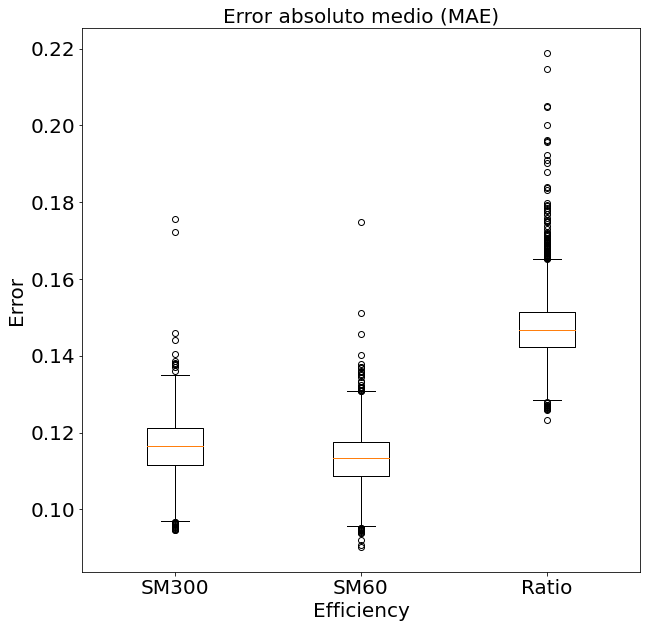

In [8]:
plot_boxplot_metric(data_scoring_metrics, "Efficiency", "MAE")

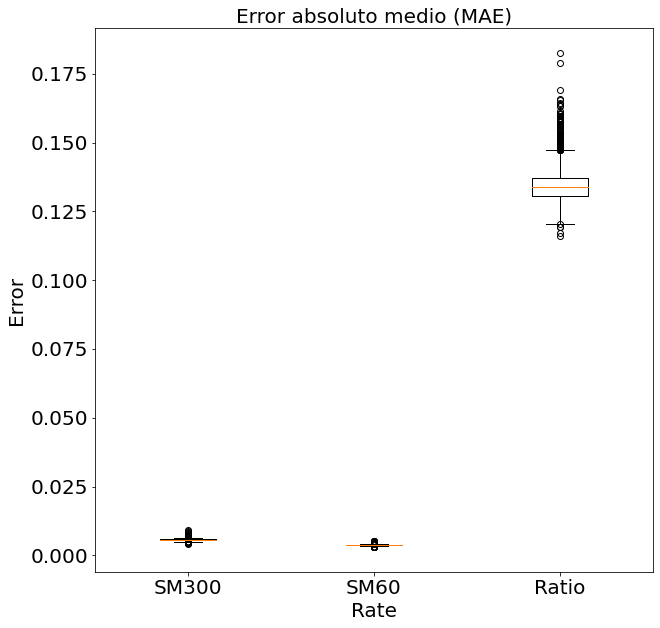

In [9]:
plot_boxplot_metric(data_scoring_metrics, "Rate", "MAE")

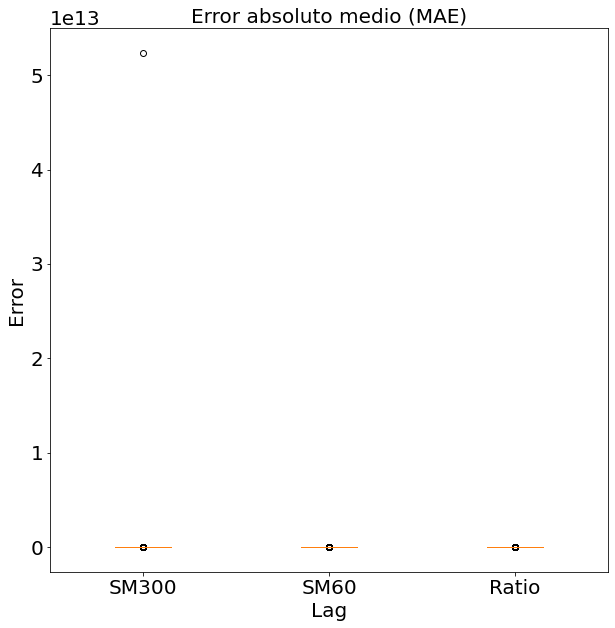

In [10]:
plot_boxplot_metric(data_scoring_metrics, "Lag", "MAE")

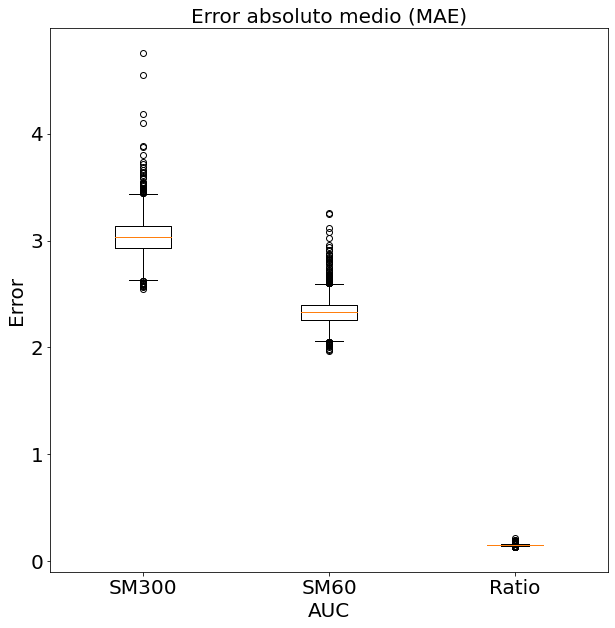

In [11]:
plot_boxplot_metric(data_scoring_metrics, "AUC", "MAE")

In [12]:
time_df = pd.read_csv(f'/home/khaldrem/code/sc_regmod/dataset/models/filter/{EXP_NUM}/csv/time_metrics_overall.csv')

In [13]:
time_df.head()

,Unnamed: 0,filename,total_per_file,SM300-Efficiency_training_model_time,SM300-Efficiency_test_model_time,SM300-Rate_training_model_time,SM300-Rate_test_model_time,SM300-Lag_training_model_time,SM300-Lag_test_model_time,SM300-AUC_training_model_time,...,SM60-AUC_training_model_time,SM60-AUC_test_model_time,Ratio-Efficiency_training_model_time,Ratio-Efficiency_test_model_time,Ratio-Rate_training_model_time,Ratio-Rate_test_model_time,Ratio-Lag_training_model_time,Ratio-Lag_test_model_time,Ratio-AUC_training_model_time,Ratio-AUC_test_model_time
0,0,YCL059C,2.3778,0.8571,0.0010,0.1515,0.0006,0.1478,0.0008,0.1342,...,0.1434,0.0006,0.1274,0.0006,0.1218,0.0006,0.1257,0.0008,0.1289,0.0006
1,1,YBR004C,2.4266,0.1595,0.0016,0.1659,0.0038,0.1666,0.0016,0.2051,...,0.1813,0.0086,0.1451,0.0166,0.1748,0.0100,0.2599,0.0025,0.1649,0.0049
2,2,YDR241W,2.7203,0.1622,0.0350,0.1838,0.0164,0.2002,0.0145,0.1955,...,0.1850,0.0058,0.1914,0.0118,0.2216,0.0074,0.1804,0.0105,0.2091,0.0149
3,3,YEL023C,5.3152,0.3743,0.0128,0.4323,0.0163,0.4320,0.0100,0.3660,...,0.4092,0.0213,0.4051,0.0093,0.4100,0.0042,0.4140,0.0130,0.4430,0.0101
4,4,YMR303C,2.5994,0.1342,0.0029,0.2086,0.0077,0.1783,0.0302,0.1762,...,0.1586,0.0057,0.2065,0.0097,0.1961,0.0350,0.1635,0.0277,0.1826,0.0162


In [14]:
time_df.describe()

,Unnamed: 0,total_per_file,SM300-Efficiency_training_model_time,SM300-Efficiency_test_model_time,SM300-Rate_training_model_time,SM300-Rate_test_model_time,SM300-Lag_training_model_time,SM300-Lag_test_model_time,SM300-AUC_training_model_time,SM300-AUC_test_model_time,...,SM60-AUC_training_model_time,SM60-AUC_test_model_time,Ratio-Efficiency_training_model_time,Ratio-Efficiency_test_model_time,Ratio-Rate_training_model_time,Ratio-Rate_test_model_time,Ratio-Lag_training_model_time,Ratio-Lag_test_model_time,Ratio-AUC_training_model_time,Ratio-AUC_test_model_time
count,5740.000000,5740.000000,5740.000000,5740.000000,5740.000000,5740.000000,5740.000000,5740.000000,5740.000000,5740.000000,...,5740.000000,5740.000000,5740.000000,5740.000000,5740.000000,5740.000000,5740.000000,5740.000000,5740.000000,5740.000000
mean,2869.500000,2.735020,0.183927,0.008659,0.200596,0.008746,0.202709,0.008835,0.203104,0.008789,...,0.202967,0.008855,0.203237,0.008812,0.202735,0.008916,0.202753,0.008822,0.203290,0.008816
std,1657.139604,1.337222,0.100213,0.008228,0.104820,0.008242,0.105395,0.008404,0.105047,0.008190,...,0.106592,0.008357,0.106021,0.008308,0.106538,0.008367,0.106482,0.008275,0.106198,0.008290
min,0.000000,1.344400,0.095300,0.000500,0.093100,0.000500,0.095900,0.000500,0.094200,0.000500,...,0.093400,0.000500,0.095900,0.000500,0.094300,0.000500,0.096900,0.000500,0.095900,0.000500
25%,1434.750000,1.990950,0.129900,0.001300,0.141000,0.001300,0.142300,0.001200,0.142975,0.001300,...,0.141675,0.001300,0.142100,0.001300,0.141700,0.001300,0.141475,0.001300,0.142200,0.001200
50%,2869.500000,2.461950,0.152200,0.006500,0.172800,0.006700,0.176200,0.006700,0.176350,0.006800,...,0.175300,0.006700,0.175800,0.006700,0.174400,0.006800,0.174600,0.006900,0.176000,0.006700
75%,4304.250000,2.993900,0.196250,0.012800,0.220900,0.012900,0.222575,0.012925,0.224225,0.013000,...,0.224725,0.013000,0.224200,0.012925,0.224500,0.013300,0.223100,0.012800,0.223625,0.012900
max,5739.000000,25.823400,1.996000,0.058300,2.040300,0.061100,2.120900,0.078100,2.038900,0.055300,...,2.053300,0.050700,2.047200,0.066200,2.061700,0.064900,2.052400,0.068100,2.035200,0.057500


Text(0, 0.5, 'Valor')

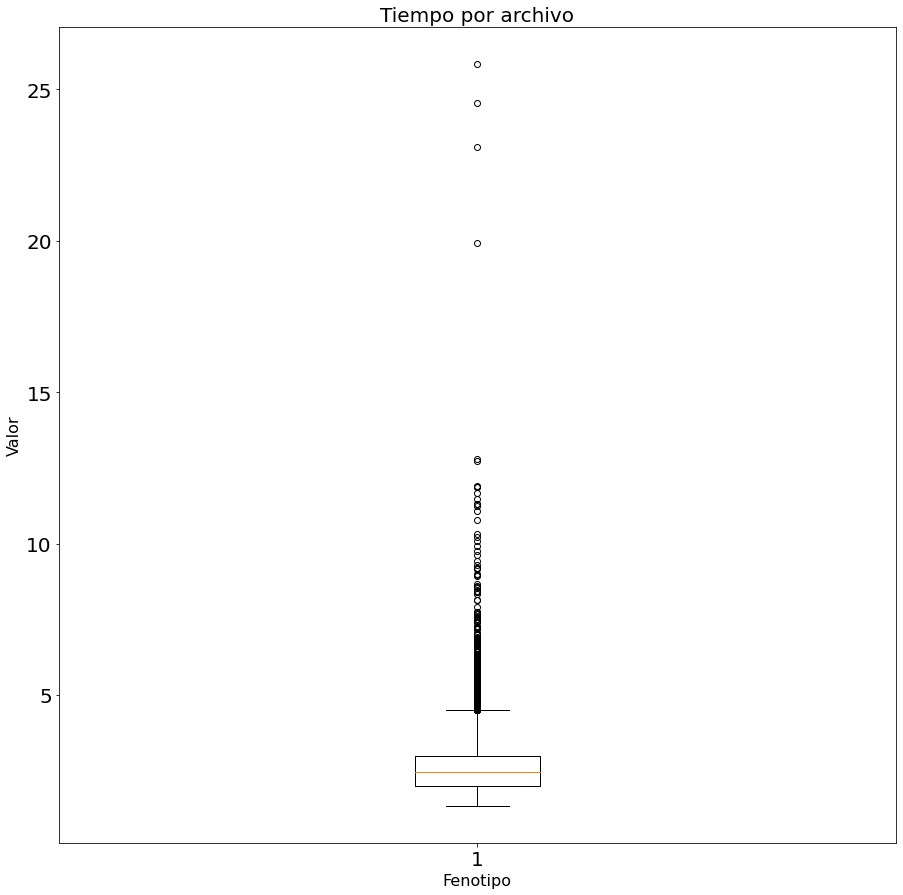

In [15]:
# time_plot = {}

# for pt in phenotypes:
#     p = pt.split("-")[1]
#     if p == "Efficiency":
#         data_plot[pt] = time_df[f"{pt}_{metric}"]

# # plt.figure(figsize=(2, 10))
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.boxplot(data_plot.values())
# ax.set_title(f'{phenotype} - Error absoluto medio (MAE)', fontsize=20)
# ax.set_xlabel('Fenotipo', fontsize=16)
# ax.set_ylabel('Valor', fontsize=16)
# ax.set_xticklabels(data_plot.keys())



fig, ax = plt.subplots(figsize=(15, 15))
ax.boxplot(time_df["total_per_file"])
ax.set_title(f'Tiempo por archivo', fontsize=20)
ax.set_xlabel('Fenotipo', fontsize=16)
ax.set_ylabel('Valor', fontsize=16)
# ax.set_xticklabels(data_plot.keys())
